# TEST V


## Preliminaries


In [3]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
from HMOD1 import HouseholdSpecializationModelClass

## Question 1

In [4]:
# Create an instance of the model for question 1
model = HouseholdSpecializationModelClass()
model.par.alpha = 0.5
model.par.sigma = 1
name = model.solve_discrete(do_print=True)
print(name)

LM = 4.5000
HM = 4.5000
LF = 4.5000
HF = 4.5000
namespace(LM=4.5, HM=4.5, LF=4.5, HF=4.5)


## Question 1

### Methodology 
Below we import the class form HMOD1 whereafter we create an instance of the class. We then use the method to calculate the value of the function at the given points and print the result.

In [5]:
from HMOD1 import HouseholdSpecializationModelClass
import numpy as np

# create model
model = HouseholdSpecializationModelClass()

# set up alpha and sigma values to loop through
alpha_vals = [0.25, 0.5, 0.75]
sigma_vals = [0.5, 1.0, 1.5]

# set up array to store results
ratio_results = np.zeros((len(alpha_vals), len(sigma_vals)))

# loop through alpha and sigma values and solve model for each combination
for i, alpha in enumerate(alpha_vals):
    for j, sigma in enumerate(sigma_vals):
        # set model parameters
        model.par.alpha = alpha
        model.par.sigma = sigma
        
        # solve model
        sol = model.solve_discrete()
        
        # store ratio of HF to HM
        ratio_results[i, j] = sol.HF / sol.HM
        
# print results
print("Ratio of HF to HM:")
print(ratio_results)


/Users/vg/Desktop/projects-2023-valros/inauguralproject/V/HMOD1.py:62: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


Ratio of HF to HM:
[[0.54545455 0.30769231 0.21428571]
 [1.         1.         1.        ]
 [1.83333333 3.25       4.66666667]]


## Question 1.2
### Plot the ratios in a "Heatmap"

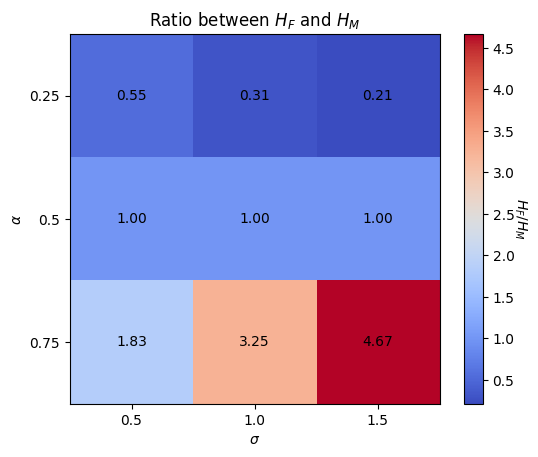

In [6]:
import matplotlib.pyplot as plt

# create heatmap of ratios
fig, ax = plt.subplots()
im = ax.imshow(ratio_results, cmap='coolwarm')

# set tick labels
ax.set_xticks(np.arange(len(sigma_vals)))
ax.set_yticks(np.arange(len(alpha_vals)))
ax.set_xticklabels(sigma_vals)
ax.set_yticklabels(alpha_vals)
ax.set_xlabel(r'$\sigma$')
ax.set_ylabel(r'$\alpha$')

# add colorbar
cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel(r'$H_F/H_M$', rotation=270, labelpad=10)

# loop over data and add annotations
for i in range(len(alpha_vals)):
    for j in range(len(sigma_vals)):
        text = ax.text(j, i, f"{ratio_results[i, j]:.2f}",
                       ha="center", va="center", color="black")

# set plot title
plt.title("Ratio between" + " " + r'$H_F$' + " " + "and" + " " r'$H_M$')

# show plot
plt.show()


## Question 2

### Methodology 
In this part we will use the same methodology as in the previous part. We will use the same data set and the same model. We will only change the way we calculate the ratios.

/Users/vg/Desktop/projects-2023-valros/inauguralproject/V/HMOD1.py:182: RuntimeWarning: invalid value encountered in divide
  y = np.log(sol.HF_vec/sol.HM_vec)


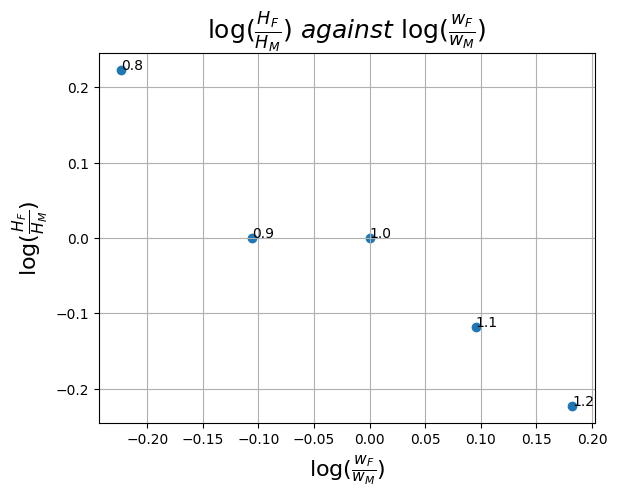

In [34]:
model = HouseholdSpecializationModelClass()

# solve for HF/HM ratios
HF_HM_ratios = model.solve_wF_vec(discrete=True)

# run regression
model.run_regression()

# plot results
plt.scatter(np.log(model.par.wF_vec), np.log(HF_HM_ratios))
plt.plot(np.log(model.par.wF_vec), model.sol.beta0 + model.sol.beta1 * np.log(model.par.wF_vec))
plt.xlabel(r'$\log(\frac{w_F}{w_M})$', fontsize = 16)
plt.ylabel(r'$\log(\frac{H_F}{H_M})$', fontsize = 16)
plt.title(r'$\log(\frac{H_F}{H_M}) \ against \ \log(\frac{w_F}{w_M})$', fontsize = 18)
"Log(HF/HM) vs. Log(wF/wM)"
# add labels to scatter plot points
for i, txt in enumerate(model.par.wF_vec):
    plt.annotate(txt, (np.log(model.par.wF_vec[i]), np.log(HF_HM_ratios[i])))

plt.grid(True)
plt.show()


## Question 3
We now assume that the choice set is continuous. We will use the same data set and the same model. We will only change the way we calculate the ratios.


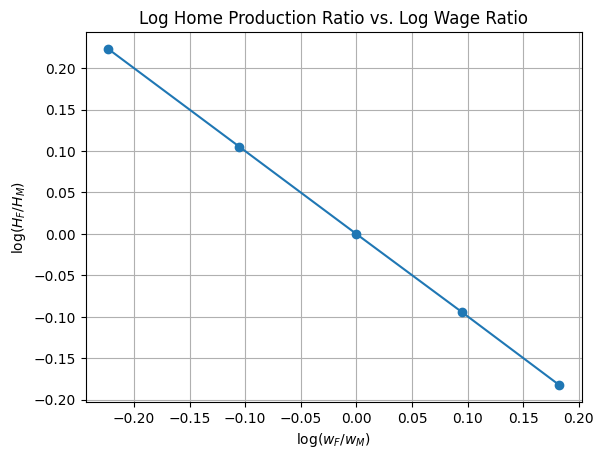

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from HMOD1 import HouseholdSpecializationModelClass

# Instantiate the model
model = HouseholdSpecializationModelClass()

# Solve the model for the vector of female wages
HF_HM_ratios = model.solve_wF_vec()

# Calculate log ratios
log_wage_ratios = np.log(model.par.wF_vec / model.par.wM)
log_HF_HM_ratios = np.log(HF_HM_ratios)

# Create the plot
plt.plot(log_wage_ratios, log_HF_HM_ratios, marker='o', linestyle='-')
plt.xlabel('$\log(w_F/w_M)$')
plt.ylabel('$\log(H_F/H_M)$')
plt.title('Log Home Production Ratio vs. Log Wage Ratio')
plt.grid(True)
plt.show()



# Question 4
To minimize the objective function $\left(\beta_0-\hat{\beta}_0\right)^2+\left(\beta_1-\hat{\beta}_1\right)^2$ and find the best values for $\alpha$ and $\sigma$, you can use the following approach:

Define a function to calculate the objective function for given $\alpha$ and $\sigma$.
Use an optimization method like grid search or gradient-based optimization to find the best values for $\alpha$ and $\sigma$.

In [14]:
import numpy as np
from scipy import optimize
from HMOD1 import HouseholdSpecializationModelClass

# 1. Define the objective function
def objective(params, model):
    alpha, sigma = params
    model.par.alpha = alpha
    model.par.sigma = sigma
    
    # Solve the model for the vector of female wages and run the regression
    model.solve_wF_vec()
    model.run_regression()
    
    beta0_diff = (model.par.beta0_target - model.sol.beta0)**2
    beta1_diff = (model.par.beta1_target - model.sol.beta1)**2
    
    return beta0_diff + beta1_diff

# 2. Optimize the objective function
model = HouseholdSpecializationModelClass()

# Define the initial guess and bounds for the parameters
x0 = [0.5, 1.0]
bounds = [(0.01, 0.99), (0.01, 5.0)]

# Optimize using the minimize function from the scipy library
opt_result = optimize.minimize(objective, x0, args=(model), bounds=bounds)

# Print the optimal values for alpha and sigma
alpha_opt, sigma_opt = opt_result.x
print(f'Optimal alpha: {alpha_opt:.4f}')
print(f'Optimal sigma: {sigma_opt:.4f}')


Optimal alpha: 0.5000
Optimal sigma: 1.0000


# Question 5
